In [16]:
%matplotlib inline

import json
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def getGraphData(data):
    x =[]
    x_length = len(data["0"]["x"])
    for i in range(x_length):
        x.append(data["0"]["x"][i])
    mean = []
    variance = []
    minValue = []
    maxValue = []
    sd = []
    length = len(data["0"]["y"])
    #print(length)
    for j in range(length):
        dataarray = []
        for i in data:
            dataarray.append(data[i]["y"][j])
        mean.append(np.mean(dataarray))
        variance.append(np.var(dataarray))
        maxValue.append(np.amax(dataarray))
        minValue.append(np.amin(dataarray))
        sd.append(np.std(dataarray))
    
    stdUp = np.add(mean ,sd)
    stdDown = np.subtract(mean ,sd)
    
    return x,mean,stdUp,stdDown

def meanAndStandardError(data):
    acc = []
    
    for i in data:
        acc.append(data[i]["y"][199])
        print(data[i]["y"][199])
    
    mean = np.mean(acc)
    standardError = np.std(acc)/np.sqrt(3)
    return mean,standardError

def buildGraphs(file, name, value, zoom=None):
    data = json.load(open(file))
    x,mean,stdUp,stdDown = getGraphData(data)
    last_epoch_mean, last_epoch_ste = meanAndStandardError(data)
    print("")
    print("Mean and Standard Error")
    print(last_epoch_mean, last_epoch_ste)
    if zoom:
        plt.xlim(0, 20000)
    plt.rc('font',size=14)
    plt.plot(x, mean, label=value)
    plt.legend(loc='best')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(plt.ylim()[0], 1.0)
    #plt.yticks(np.arange(0, 1.0, 0.1))
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.tight_layout()
    plt.fill_between(x, stdUp, stdDown, alpha='0.5')
    plt.savefig(name)
    #plt.figure()

    
def doEverything(dataSources, saveFile, label, zoom=None):
    j = 0
    for i in dataSources:
        buildGraphs(i, saveFile, label[j], zoom)
        print("")
        j = j+1
    

0.955399992943
0.951499992967
0.952099992633

Mean and Standard Error
0.952999992848 0.000989949520935

0.889199996948
0.815000002027
0.830000002027

Mean and Standard Error
0.844733333667 0.0184945223572



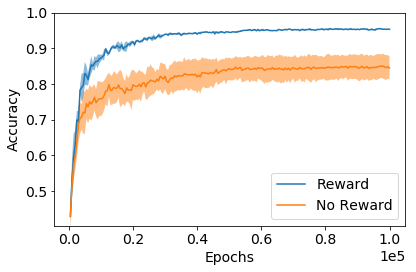

In [18]:
doEverything(["dropout_0.25_reward_acc.json", "dropout_0.25_no_reward_acc.json"],
             "dropout_0.25.png",
             ["Reward", "No Reward"])

0.917999993801
0.908499995112
0.91709999311

Mean and Standard Error
0.914533327341 0.00247221554481

0.716199999154
0.719099999309
0.640399999917

Mean and Standard Error
0.69189999946 0.0210358950628



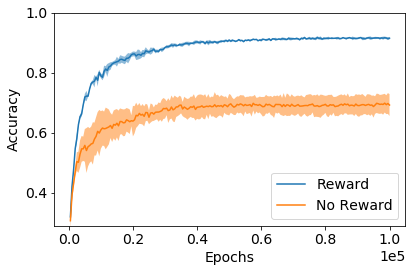

In [19]:
doEverything(["dropout_0.75_reward_acc.json", "dropout_0.75_no_reward_acc.json"],
             "dropout_0.75.png",
             ["Reward", "No Reward"])

0.930899992108
0.939299992442
0.938799993157

Mean and Standard Error
0.936333325902 0.00222127775599

0.717799998939
0.585100000799
0.762100000501

Mean and Standard Error
0.688333333413 0.0434190517746



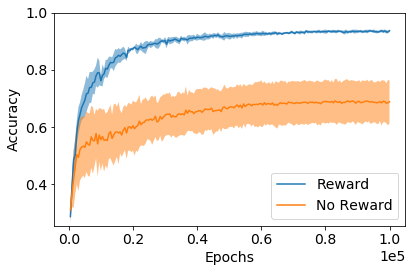

In [20]:
doEverything(["mg_reward_acc.json", "mg_no_reward_acc.json"],
             "mg.png",
             ["Reward", "No Reward"])

0.958699993491
0.961599992752
0.962199993253

Mean and Standard Error
0.960833326499 0.000882336851964

0.601200000525
0.801300001144
0.864500000358

Mean and Standard Error
0.755666667342 0.0647963019236



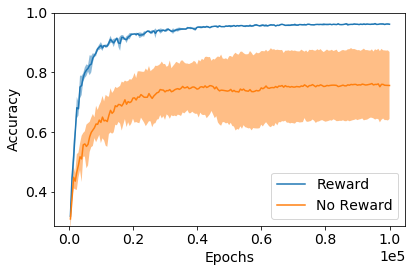

In [21]:
doEverything(["concrete_reward_acc.json", "concrete_no_reward_acc.json"],
             "concrete.png",
             ["Reward", "No Reward"])

0.958699993491
0.961599992752
0.962199993253

Mean and Standard Error
0.960833326499 0.000882336851964

0.930899992108
0.939299992442
0.938799993157

Mean and Standard Error
0.936333325902 0.00222127775599

0.955399992943
0.951499992967
0.952099992633

Mean and Standard Error
0.952999992848 0.000989949520935

0.917999993801
0.908499995112
0.91709999311

Mean and Standard Error
0.914533327341 0.00247221554481



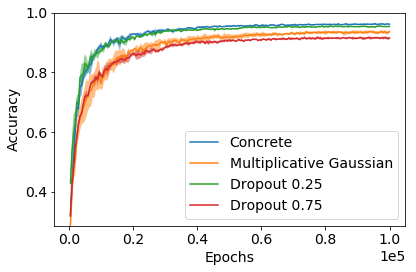

In [22]:
doEverything(["concrete_reward_acc.json", "mg_reward_acc.json", "dropout_0.25_reward_acc.json", 
              "dropout_0.75_reward_acc.json"],
             "compare_Srts.png",
             ["Concrete", "Multiplicative Gaussian", "Dropout 0.25", "Dropout 0.75"])


0.958699993491
0.961599992752
0.962199993253

Mean and Standard Error
0.960833326499 0.000882336851964

0.930899992108
0.939299992442
0.938799993157

Mean and Standard Error
0.936333325902 0.00222127775599

0.955399992943
0.951499992967
0.952099992633

Mean and Standard Error
0.952999992848 0.000989949520935

0.917999993801
0.908499995112
0.91709999311

Mean and Standard Error
0.914533327341 0.00247221554481



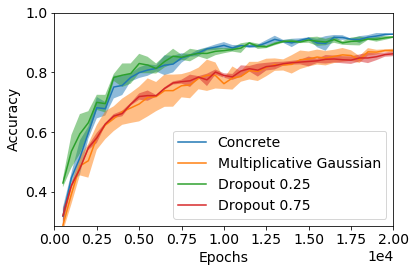

In [23]:
doEverything(["concrete_reward_acc.json", "mg_reward_acc.json", "dropout_0.25_reward_acc.json", 
              "dropout_0.75_reward_acc.json"],
             "compare_Srts.png",
             ["Concrete", "Multiplicative Gaussian", "Dropout 0.25", "Dropout 0.75"], zoom=20000)

0.969499993682
0.968599993229
0.969999994159

Mean and Standard Error
0.969366660357 0.000334442814489

0.958699993491
0.961599992752
0.962199993253

Mean and Standard Error
0.960833326499 0.000882336851964

0.601200000525
0.801300001144
0.864500000358

Mean and Standard Error
0.755666667342 0.0647963019236



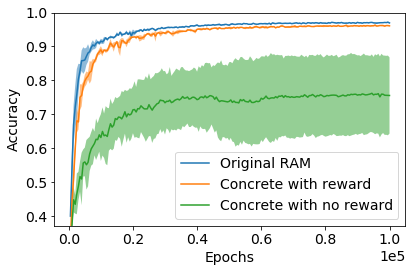

In [24]:
doEverything(["vanilla_acc.json","concrete_reward_acc.json", "concrete_no_reward_acc.json",],
             "compare_models.png",
             ["Original RAM", "Concrete with reward", "Concrete with no reward"])

0.969499993682

Mean and Standard Error
0.969499993682 0.0

0.958699993491

Mean and Standard Error
0.958699993491 0.0

0.801300001144

Mean and Standard Error
0.801300001144 0.0



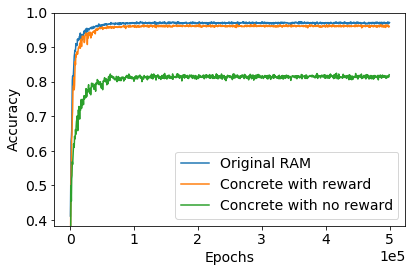

In [25]:
doEverything(['vanilla_500000_acc.json', 'concrete_reward_500000_acc.json','concrete_no_reward_500000_acc.json'],
             "compare_models_500000.png",
             ["Original RAM", "Concrete with reward", "Concrete with no reward"])